# Download GeoJSON from GeoBoundaries

This notebook will download GeoJSON shapes directly from the GeoBoundaries API.

See the [Dataset list](https://www.geoboundaries.org/index.html#getdata) for a list of supported countries / admin boundary levels.

All the boundary files are also available for preview on GitHub [here](https://github.com/wmgeolab/geoBoundaries). See e.g. https://github.com/wmgeolab/geoBoundaries/blob/main/releaseData/gbOpen/BDI/ADM1/geoBoundaries-BDI-ADM1.geojson

🚨 __WARNING__: geoBoundaries license requires attribution! These generated shapes can only be used when giving proper credit in the UI

## Install Dependencies

```
pip install geopandas shapely matplotlib
```

## Configuration

In [103]:
country_list = [
    {"code": "BDI", "level": "ADM1", "name": "Burundi Provinces", "filename": "burundi"},
    {"code": "BDI", "level": "ADM2", "name": "Burundi Communes", "filename": "burundi_communes"},
    {"code": "RWA", "level": "ADM1", "name": "Rwanda Provinces", "filename": "rwanda"},
    {"code": "RWA", "level": "ADM2", "name": "Rwanda Districts", "filename": "rwanda_districts"},
    {"code": "ETH", "level": "ADM1", "name": "Ethiopia Regions", "filename": "ethiopia"},
    {"code": "ETH", "level": "ADM2", "name": "Ethiopia Zones", "filename": "ethiopia_zones"},
    {"code": "ETH", "level": "ADM3", "name": "Ethiopia Woredas", "filename": "ethiopia_woredas"},
    {"code": "KEN", "level": "ADM1", "name": "Kenya Provinces", "filename": "kenya"},
    {"code": "KEN", "level": "ADM2", "name": "Kenya Counties", "filename": "kenya_counties"},
    {"code": "TZA", "level": "ADM1", "name": "Tanzania Regions", "filename": "tanzania"},
    {"code": "TZA", "level": "ADM2", "name": "Tanzania Districts", "filename": "tanzania_districts"},
    {"code": "UGA", "level": "ADM1", "name": "Uganda Regions", "filename": "uganda"},
    {"code": "UGA", "level": "ADM2", "name": "Uganda Districts", "filename": "uganda_districts"},
    {"code": "NGA", "level": "ADM1", "name": "Nigeria States", "filename": "nigeria"},
    {"code": "NGA", "level": "ADM2", "name": "Nigeria Local Government Areas", "filename": "nigeria_areas"},
    {"code": "ZMB", "level": "ADM1", "name": "Zambia Provinces", "filename": "zambia"},
    {"code": "ZMB", "level": "ADM2", "name": "Zambia Districts",
        "filename": "zambia_districts"},
]

# the github branch/tag to download the data from...
github_tag = 'main'

# Where to download files
cache_dir = os.path.expanduser("~/Downloads")


## Download

In [104]:
import geopandas as gpd
import json
import matplotlib.pyplot as plt
import os
import requests

country_data = []

if not os.path.exists(cache_dir):
    os.mkdir(cache_dir)

print(f"Processing {len(country_list)} countries")

for country in country_list:
    print(f"Processing {country['name']}")
    url = f"https://github.com/wmgeolab/geoBoundaries/raw/{github_tag}/releaseData/gbOpen/{country['code']}/{country['level']}/geoBoundaries-{country['code']}-{country['level']}.geojson"
    file_name = url.split('/')[-1]
    full_file_name = f'{cache_dir}/{file_name}'
    data = None

    if os.path.exists(full_file_name):
        try:
            with open(full_file_name, "r") as jsonFile:
                data = json.load(jsonFile)
            print(f"Found file {full_file_name} in cache, using it")
        except:
            print(f"Error reading file {full_file_name}")
            continue

    if data is None or not 'features' in data:
        print(f"No valid cache found, downloading...")
        with requests.get(url) as response:
            response.raise_for_status()
            with open(full_file_name, "w") as fh:
                fh.write(response.text)
            # data = response.json()
            print(f"Downloaded data for {country['name']} ({country['code']}/{country['level']})")

    if data and data['features']:
        print(f"...it has {len(data['features'])} features")
        
        # Rename keys to match the expected attributes: ISO, NAME_1
        for feature in data['features']:
            feature['properties'] = {
                'ISO': feature['properties'].get('shapeISO',feature['properties']['shapeID']),
                'NAME_1': feature['properties']['shapeName'],
            }
        
        # Load as GeoDataFrame
        df = gpd.GeoDataFrame.from_features(data, crs='EPSG:4326')
        country_details = country.copy()
        country_details['df'] = df
        country_data.append(country_details)

print('All data loaded!')

Processing 17 countries
Processing Burundi Provinces
Found file /Users/yann/Downloads/geoBoundaries-BDI-ADM1.geojson in cache, using it
...it has 17 features
Processing Burundi Communes
Error reading file /Users/yann/Downloads/geoBoundaries-BDI-ADM2.geojson
Processing Rwanda Provinces
Found file /Users/yann/Downloads/geoBoundaries-RWA-ADM1.geojson in cache, using it
...it has 5 features
Processing Rwanda Districts
Found file /Users/yann/Downloads/geoBoundaries-RWA-ADM2.geojson in cache, using it
...it has 30 features
Processing Ethiopia Regions
Found file /Users/yann/Downloads/geoBoundaries-ETH-ADM1.geojson in cache, using it
...it has 11 features
Processing Ethiopia Zones
Found file /Users/yann/Downloads/geoBoundaries-ETH-ADM2.geojson in cache, using it
...it has 74 features
Processing Ethiopia Woredas
Found file /Users/yann/Downloads/geoBoundaries-ETH-ADM3.geojson in cache, using it
...it has 690 features
Processing Kenya Provinces
Found file /Users/yann/Downloads/geoBoundaries-KEN-A

Preview:

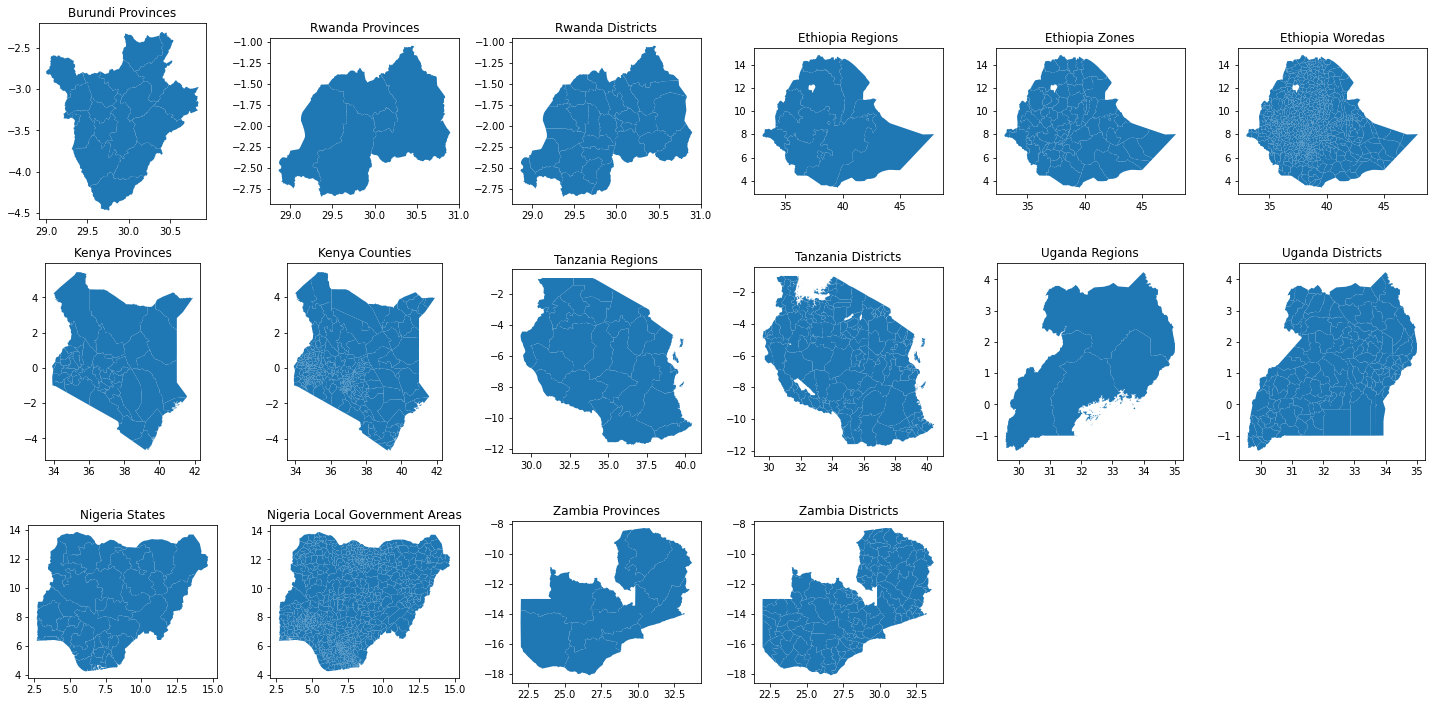

                                             geometry    ISO            NAME_1
0   POLYGON ((29.34228 -3.43836, 29.34499 -3.43847...  BI-BM  Bujumbura Mairie
1   POLYGON ((29.34228 -3.43836, 29.34232 -3.43854...  BI-BL   Bujumbura Rural
2   POLYGON ((29.31277 -3.73115, 29.31285 -3.73128...  BI-BR            Bururi
3   POLYGON ((29.53607 -4.19214, 29.53615 -4.19221...  BI-MA           Makamba
4   POLYGON ((29.81476 -4.04145, 29.81510 -4.04224...  BI-RT            Rutana
5   POLYGON ((30.63460 -3.36100, 30.63476 -3.36033...  BI-CA           Cankuzo
6   POLYGON ((30.38927 -3.72468, 30.38930 -3.72460...  BI-RY            Ruyigi
7   POLYGON ((29.50221 -3.26337, 29.50276 -3.26339...  BI-BB           Bubanza
8   POLYGON ((29.48584 -2.91697, 29.48578 -2.91667...  BI-CI          Cibitoke
9   POLYGON ((29.54849 -3.10670, 29.54909 -3.10680...  BI-KY           Kayanza
10  POLYGON ((29.58061 -3.38137, 29.58076 -3.38085...  BI-MU          Muramvya
11  POLYGON ((29.56627 -3.55737, 29.56625 -3.55744..

In [ ]:
import math

def plot_all_countries():
    ncols = 6
    nrows = math.ceil(len(country_data) / ncols)
    plt.figure(figsize=(20, 20 * nrows / ncols))

    for i, country in enumerate(country_data):
        # create subplot axes in a grid
        # nrows, ncols, axes position
        ax = plt.subplot(nrows, ncols, i + 1)
        country['df'].plot(ax=ax)
        ax.set_title(country['name'])
        # ax.set_aspect('equal', adjustable='datalim')

    plt.tight_layout()
    plt.show()


plot_all_countries()

for country in country_data:
  print(country['df'])


## Post-processing and saving to file

Processing Burundi Provinces
Size 1.998
Simplifying by factor  0.0019983482970866192
                                             geometry    ISO            NAME_1
0   POLYGON ((29.34228 -3.43836, 29.37035 -3.44427...  BI-BM  Bujumbura Mairie
1   POLYGON ((29.34228 -3.43836, 29.34505 -3.44689...  BI-BL   Bujumbura Rural
2   POLYGON ((29.31277 -3.73115, 29.32548 -3.74049...  BI-BR            Bururi
3   POLYGON ((29.53607 -4.19214, 29.54722 -4.19685...  BI-MA           Makamba
4   POLYGON ((29.81476 -4.04145, 29.81808 -4.04425...  BI-RT            Rutana
5   POLYGON ((30.63460 -3.36100, 30.66097 -3.33157...  BI-CA           Cankuzo
6   POLYGON ((30.38927 -3.72468, 30.39177 -3.71712...  BI-RY            Ruyigi
7   POLYGON ((29.50221 -3.26337, 29.51622 -3.26253...  BI-BB           Bubanza
8   POLYGON ((29.48584 -2.91697, 29.48003 -2.90610...  BI-CI          Cibitoke
9   POLYGON ((29.54849 -3.10670, 29.57544 -3.11167...  BI-KY           Kayanza
10  POLYGON ((29.58061 -3.38137, 29.58245 -3.3

/Users/yann/Library/Python/3.8/lib/python/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/Users/yann/Library/Python/3.8/lib/python/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


File Size: 145 kb
Processing Rwanda Districts
Size 1.912
Simplifying by factor  0.0019116201419580117
                                             geometry  \
0   POLYGON ((30.07689 -1.95482, 30.07321 -1.94367...   
1   POLYGON ((30.07689 -1.95482, 30.08343 -1.96387...   
2   POLYGON ((30.08679 -2.06248, 30.09084 -2.05936...   
3   POLYGON ((29.98355 -2.23274, 29.97277 -2.23567...   
4   POLYGON ((29.84603 -2.45362, 29.83342 -2.46307...   
5   POLYGON ((29.74689 -2.69566, 29.72452 -2.67987...   
6   POLYGON ((29.66603 -2.41849, 29.65713 -2.42931...   
7   POLYGON ((29.59550 -2.25721, 29.59500 -2.25169...   
8   POLYGON ((29.98355 -2.23274, 29.99029 -2.21848...   
9   POLYGON ((29.80374 -2.11393, 29.79944 -2.10534...   
10  POLYGON ((29.98284 -1.91338, 29.97720 -1.90578...   
11  POLYGON ((29.56212 -2.20576, 29.57284 -2.20357...   
12  POLYGON ((29.55841 -2.06382, 29.55472 -2.05916...   
13  POLYGON ((29.41990 -1.72953, 29.42341 -1.71708...   
14  POLYGON ((29.43485 -1.73864, 29.44022 -

/Users/yann/Library/Python/3.8/lib/python/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/Users/yann/Library/Python/3.8/lib/python/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/Users/yann/Library/Python/3.8/lib/python/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


File Size: 430 kb
Processing Ethiopia Woredas
Size 13.084
Simplifying by factor  0.013084068784238298
                                              geometry  \
0    POLYGON ((38.73862 8.99747, 38.72002 8.99961, ...   
1    POLYGON ((38.77361 8.95276, 38.78090 8.93696, ...   
2    POLYGON ((38.73862 8.99747, 38.75448 9.02002, ...   
3    POLYGON ((38.76504 8.98110, 38.77758 9.01678, ...   
4    POLYGON ((38.89750 9.03154, 38.86906 9.08595, ...   
..                                                 ...   
685  POLYGON ((35.74181 9.03081, 35.78237 9.10618, ...   
686  POLYGON ((36.53871 10.26410, 36.53362 10.18284...   
687  POLYGON ((36.68574 10.29294, 36.73507 10.24580...   
688  POLYGON ((35.12517 9.18915, 35.15789 9.07239, ...   
689  POLYGON ((35.08672 9.25320, 35.12189 9.20086, ...   

                            ISO      NAME_1  
0    ETH-ADM3-50319843B73149203  Nefas Silk  
1    ETH-ADM3-50319843B66346631        Bole  
2    ETH-ADM3-50319843B66735816      Lideta  
3    ETH-ADM3-503

/Users/yann/Library/Python/3.8/lib/python/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


File Size: 1380 kb
Processing Kenya Provinces
Size 9.0
Simplifying by factor  0.00900038849863739
                                             geometry    ISO           NAME_1
0   POLYGON ((36.05061 4.45622, 35.94395 4.54803, ...  KE-43          Turkana
1   POLYGON ((36.60089 2.40574, 36.60889 2.39656, ...  KE-25         Marsabit
2   POLYGON ((40.99195 2.17919, 40.99252 2.82475, ...  KE-24          Mandera
3   POLYGON ((38.96255 2.09739, 38.98531 2.06964, ...  KE-46            Wajir
4   POLYGON ((34.94278 2.45547, 34.90037 2.43989, ...  KE-47       West Pokot
5   POLYGON ((36.39206 0.91877, 36.39629 0.90449, ...  KE-37          Samburu
6   POLYGON ((37.94529 1.26288, 37.94816 1.19432, ...  KE-09           Isiolo
7   POLYGON ((35.79194 1.66362, 35.77635 1.64355, ...  KE-01          Baringo
8   POLYGON ((35.15214 1.19937, 35.24252 1.07454, ...  KE-05  Elgeyo-Marakwet
9   POLYGON ((34.82229 1.26259, 34.79435 1.21955, ...  KE-42      Trans Nzoia
10  POLYGON ((34.58077 1.15033, 34.57745 1.1

/Users/yann/Library/Python/3.8/lib/python/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


                                              geometry  \
0    POLYGON ((35.46330 0.50720, 35.39308 0.50394, ...   
1    POLYGON ((35.32495 -0.25056, 35.26960 -0.23548...   
2    POLYGON ((35.13034 0.13630, 35.09619 0.14592, ...   
3    POLYGON ((34.21848 0.16479, 34.18185 0.16864, ...   
4    POLYGON ((34.62157 -0.98540, 34.58137 -0.88635...   
..                                                 ...   
285  MULTIPOLYGON (((34.67979 0.58459, 34.67954 0.5...   
286  POLYGON ((34.94186 -0.55175, 34.92927 -0.52240...   
287  POLYGON ((36.73341 -1.27290, 36.77891 -1.25625...   
288  POLYGON ((38.41805 -3.33186, 38.40551 -3.29730...   
289  POLYGON ((37.36260 -1.09349, 37.34586 -1.12226...   

                           ISO          NAME_1  
0    KEN-ADM2-3690345B56101260        Ainabkoi  
1    KEN-ADM2-3690345B87011697         Ainamoi  
2    KEN-ADM2-3690345B66326805           Aldai  
3    KEN-ADM2-3690345B40354507    Alego Usonga  
4    KEN-ADM2-3690345B85995800          Awendo  
..       

/Users/yann/Library/Python/3.8/lib/python/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


                                             geometry    ISO  \
0   POLYGON ((37.97322 -4.58595, 38.03849 -4.62396...  TZ-09   
1   POLYGON ((35.22448 -2.49750, 35.30072 -2.21338...  TZ-13   
2   POLYGON ((37.10873 -3.47107, 37.01613 -3.50616...  TZ-26   
3   POLYGON ((37.40454 -2.89704, 35.31452 -1.71863...  TZ-01   
4   POLYGON ((32.75025 -1.00000, 30.79964 -1.00000...  TZ-05   
5   POLYGON ((34.62874 -8.65048, 34.68618 -8.53508...  TZ-14   
6   POLYGON ((34.78854 -3.82527, 34.77356 -3.81085...  TZ-23   
7   POLYGON ((38.05792 -11.27749, 38.11173 -11.260...  TZ-17   
8   POLYGON ((34.62874 -8.65048, 34.70090 -8.68949...  TZ-04   
9   MULTIPOLYGON (((39.40450 -6.82048, 39.40303 -6...  TZ-02   
10  POLYGON ((39.97553 -10.16355, 39.95755 -10.151...  TZ-12   
11  POLYGON ((33.43931 -6.94487, 33.51756 -6.88436...  TZ-24   
12  MULTIPOLYGON (((39.80692 -7.93748, 39.80563 -7...  TZ-19   
13  POLYGON ((37.97247 -10.84111, 37.86072 -10.679...  TZ-21   
14  POLYGON ((35.35643 -9.00169, 35.4117

/Users/yann/Library/Python/3.8/lib/python/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


                                              geometry  \
0    MULTIPOLYGON (((36.86084 -3.58408, 36.84833 -3...   
1    POLYGON ((36.76606 -3.39268, 36.73027 -3.36315...   
2    POLYGON ((35.83271 -3.42424, 35.84405 -3.39364...   
3    MULTIPOLYGON (((36.35742 -3.05734, 36.35728 -3...   
4    POLYGON ((36.86084 -3.58408, 36.89262 -3.59561...   
..                                                 ...   
165  POLYGON ((38.11519 -4.58343, 38.16747 -4.63707...   
166  POLYGON ((38.66130 -4.93241, 38.70215 -4.93257...   
167  POLYGON ((38.70448 -5.42560, 38.70228 -5.41177...   
168  POLYGON ((38.79584 -5.96227, 38.81612 -5.93427...   
169  POLYGON ((38.89844 -5.03611, 38.90257 -5.08330...   

                            ISO        NAME_1  
0      TZA-ADM2-72390352B468627        Arusha  
1    TZA-ADM2-72390352B98762390  Arusha Urban  
2    TZA-ADM2-72390352B71752146        Karatu  
3    TZA-ADM2-72390352B61683426       Longido  
4    TZA-ADM2-72390352B28384193          Meru  
..             

/Users/yann/Library/Python/3.8/lib/python/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


                                            geometry   ISO           NAME_1
0  POLYGON ((34.78710 1.36522, 34.80650 1.38383, ...  UG-N  Northern Region
1  MULTIPOLYGON (((33.66433 -0.13367, 33.68802 -0...  UG-E   Eastern Region
2  MULTIPOLYGON (((33.39414 0.23746, 33.40942 0.2...  UG-C   Central Region
3  POLYGON ((31.35819 2.24848, 31.36593 2.21236, ...  UG-W   Western Region
File Size: 174 kb
Processing Uganda Districts
Size 5.569
Simplifying by factor  0.005569057222503663


/Users/yann/Library/Python/3.8/lib/python/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


                                              geometry  \
0    POLYGON ((33.96576 2.61670, 33.88091 2.67045, ...   
1    POLYGON ((32.06201 3.57961, 32.04467 3.59235, ...   
2    POLYGON ((33.55948 3.14894, 33.55052 3.28146, ...   
3    POLYGON ((33.53498 2.35203, 33.43097 2.36378, ...   
4    POLYGON ((32.94045 1.81336, 32.88765 1.80683, ...   
..                                                 ...   
130  POLYGON ((31.60093 0.05001, 31.57900 0.05929, ...   
131  POLYGON ((33.97873 0.57800, 34.01260 0.57565, ...   
132  POLYGON ((32.50099 -0.15249, 32.62010 -0.00211...   
133  POLYGON ((31.40883 3.18405, 31.47841 3.18905, ...   
134  POLYGON ((30.79203 2.64443, 30.77920 2.60101, ...   

                            ISO      NAME_1  
0    UGA-ADM2-29229248B11975926        Abim  
1     UGA-ADM2-29229248B4727943    Adjumani  
2    UGA-ADM2-29229248B58561496       Agago  
3    UGA-ADM2-29229248B69270541    Alebtong  
4    UGA-ADM2-29229248B46493380    Amolatar  
..                         

/Users/yann/Library/Python/3.8/lib/python/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/Users/yann/Library/Python/3.8/lib/python/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


File Size: 391 kb
Processing Nigeria Local Government Areas
Size 10.75
Simplifying by factor  0.010749691843374357
                                              geometry  \
0    POLYGON ((7.40111 5.08195, 7.38751 5.13243, 7....   
1    POLYGON ((7.33448 5.10490, 7.31383 5.09410, 7....   
2    POLYGON ((13.83477 13.42336, 13.63164 13.71172...   
3    POLYGON ((7.04587 9.23050, 6.80029 9.22511, 6....   
4    POLYGON ((7.81124 5.09453, 7.78710 5.12012, 7....   
..                                                 ...   
769  POLYGON ((8.18284 9.52047, 8.23497 9.52771, 8....   
770  POLYGON ((7.50717 11.00675, 7.54492 10.98591, ...   
771  POLYGON ((11.71035 9.07119, 11.65765 9.02730, ...   
772  POLYGON ((7.02841 12.78798, 7.04768 12.99911, ...   
773  POLYGON ((5.15425 11.34661, 5.20303 11.33073, ...   

                            ISO       NAME_1  
0    NGA-ADM2-72505758B79815894    Aba North  
1    NGA-ADM2-72505758B67905963    Aba South  
2    NGA-ADM2-72505758B57073987       Abadam  


/Users/yann/Library/Python/3.8/lib/python/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


File Size: 1578 kb
Processing Zambia Provinces
Size 10.727
Simplifying by factor  0.010726695356912092
                                            geometry   ISO         NAME_1
0  POLYGON ((31.44184 -13.42683, 31.42296 -13.401...  ZM10        Central
1  POLYGON ((29.04534 -13.40998, 28.99594 -13.426...  ZM20     Copperbelt
2  POLYGON ((30.01054 -14.64468, 30.05564 -14.664...  ZM30        Eastern
3  POLYGON ((30.46917 -11.50624, 30.11514 -11.221...  ZM40        Luapula
4  POLYGON ((27.56278 -15.48013, 27.58368 -15.506...  ZM50         Lusaka
5  POLYGON ((31.44184 -13.42683, 31.53736 -13.432...  ZM11       Muchinga
6  POLYGON ((26.83124 -13.72558, 26.77454 -13.674...  ZM70  North-Western
7  POLYGON ((30.46917 -11.50624, 30.52183 -11.474...  ZM60       Northern
8  POLYGON ((25.43324 -16.10008, 25.36934 -16.133...  ZM80       Southern
9  POLYGON ((25.59694 -14.53638, 25.55754 -14.525...  ZM90        Western
File Size: 186 kb
Processing Zambia Districts
Size 10.717
Simplifying by factor  0.

/Users/yann/Library/Python/3.8/lib/python/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


                                              geometry  \
0    POLYGON ((32.74355 -13.97731, 32.58625 -13.934...   
1    POLYGON ((32.98907 -10.33498, 32.93502 -10.379...   
2    POLYGON ((32.49527 -12.11955, 32.56965 -12.164...   
3    POLYGON ((21.99621 -13.43440, 22.01483 -13.443...   
4    POLYGON ((28.84617 -11.51781, 28.77943 -11.499...   
..                                                 ...   
111  POLYGON ((23.03060 -16.08061, 23.06495 -16.271...   
112  POLYGON ((26.35282 -12.64015, 26.39035 -12.618...   
113  POLYGON ((32.64327 -14.20251, 33.03992 -14.068...   
114  POLYGON ((21.99621 -13.43440, 21.99777 -13.726...   
115  POLYGON ((26.96850 -17.33118, 26.95184 -17.310...   

                            ISO   NAME_1  
0    ZMB-ADM2-96606910B15839099  Chadiza  
1    ZMB-ADM2-96606910B47882030    Chama  
2    ZMB-ADM2-96606910B49150910  Chasefu  
3    ZMB-ADM2-96606910B79146559  Chavuma  
4    ZMB-ADM2-96606910B85812839   Chembe  
..                          ...      ...  
11

/Users/yann/Library/Python/3.8/lib/python/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


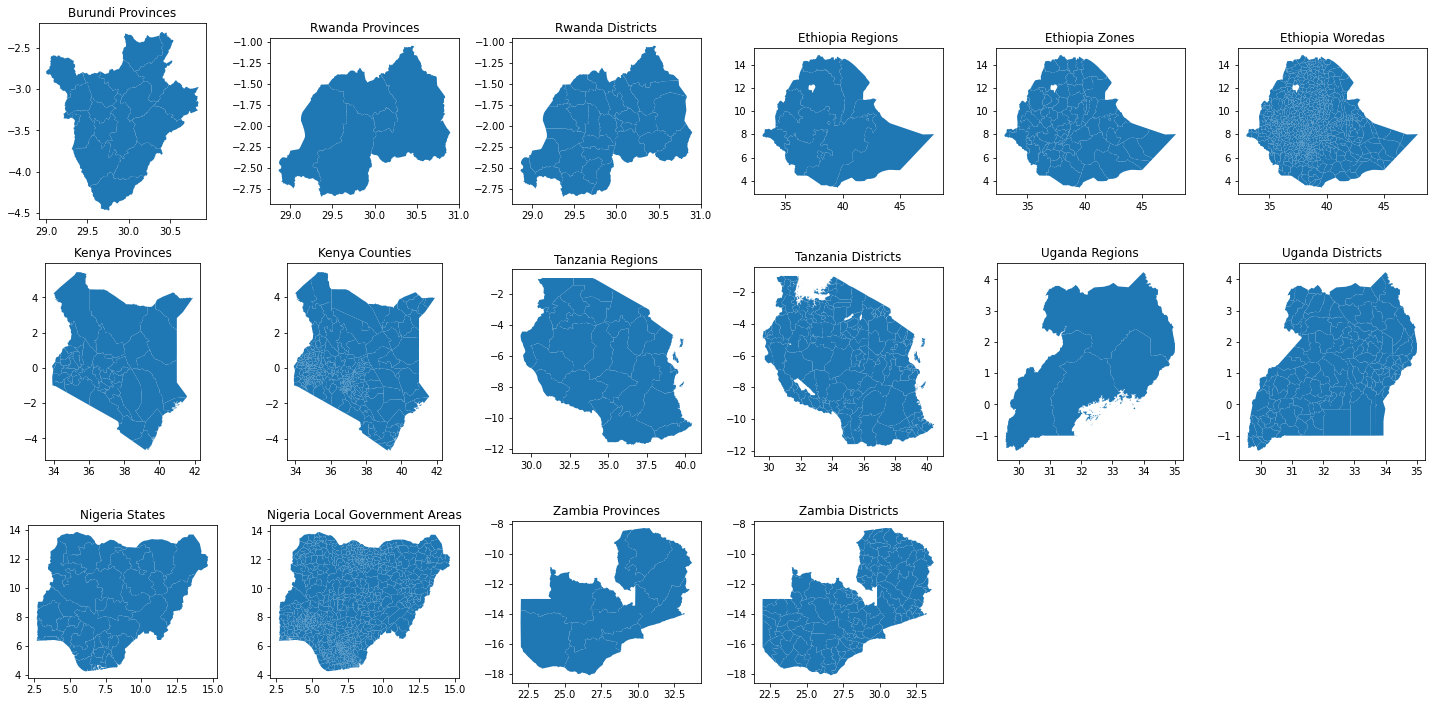

In [ ]:
def get_simplify_factor_by_size(gdf):
    xmin, ymin, xmax, ymax = gdf.total_bounds
    size = math.sqrt((xmax - xmin) * (ymax - ymin))
    print("Size", round(size, 3))
    return size / 1000

def simplify_if_needed(gdf):
    factor = get_simplify_factor_by_size(gdf)
    if factor:
      simple_df = gdf.copy()
      print("Simplifying by factor ", factor)
      simple_df['geometry'] = simple_df['geometry'].simplify(factor)
      return simple_df
    return gdf

for country in country_data:
    print(f"Processing {country['name']}")
    simple_df = simplify_if_needed(country['df'])
    print(simple_df)
    filename = f"../src/countries/{country['filename']}.geojson"
    simple_df.to_file(filename, driver="GeoJSON", encoding='utf-8')

    # Add top-level featureCollection properties
    with open(filename, "r") as jsonFile:
        data = json.load(jsonFile)
    data["properties"] = {
      'name': country['name'],
      'attribution': 'Administrative boundaries courtesy of <a href="https://www.geoboundaries.org">geoBoundaries</a>',
    }
    # Reverse Polygons! Ugly hack to fix the wrong winding order of polygons, causing D3 to interpret the shapes as their inverse, and compute a bounding box of the entire world
    for feature in data['features']:
      if feature['geometry']:
        geometry = feature['geometry']
        if geometry['type'] == 'Polygon':
          for ring in geometry['coordinates']:
            ring.reverse()
        elif geometry['type'] == 'MultiPolygon':
          for polygon in geometry['coordinates']:
            for ring in polygon:
              ring.reverse()
    with open(filename, "w") as jsonFile:
        json.dump(data, jsonFile, ensure_ascii=True, indent=2)

    file_size = os.path.getsize(filename)
    print("File Size:", file_size // 1024, "kb")

plot_all_countries()
